In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

import numpy as np
import matplotlib.pyplot as plt

2023-03-07 23:20:21.297179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "images",
    validation_split=0.2,
    labels="inferred",
    class_names=["Austria","Australia"],
    subset="both",
    seed = 0,
    batch_size = 32,
    crop_to_aspect_ratio=True,
    image_size=(224, 224))

labels = np.array([x for x in val_ds.unbatch().map(lambda x,y: y)])
images = np.array([x for x in val_ds.unbatch().map(lambda x,y: x)])

Found 25064 files belonging to 2 classes.
Using 20052 files for training.
Using 5012 files for validation.


In [3]:
model = MobileNetV2(
    alpha = 1.0,
    include_top = True,
    weights = 'imagenet',
    input_tensor = None,
    pooling = None,
    classes = 1000,
    classifier_activation = 'softmax'
)

optimizer = optimizers.Adam()
model.compile(optimizer = optimizer, metrics = ['accuracy'])

In [4]:
import ast
  
# reading the data from the file
with open('imagenet_classnames.txt') as f:
    class_names = ast.literal_eval(f.read())

In [ ]:
predictions = model.predict(val_ds)

157/157 [==============================] - 54s 342ms/step


{327: 7, 417: 13, 443: 1, 459: 1, 549: 247, 556: 3, 591: 35, 599: 6, 619: 1, 646: 1, 709: 1, 721: 106, 737: 1, 794: 1792, 800: 2, 818: 1, 904: 288}
{417: 2, 457: 1, 459: 2, 549: 111, 556: 2, 591: 7, 619: 1, 721: 88, 728: 1, 794: 1831, 904: 460}


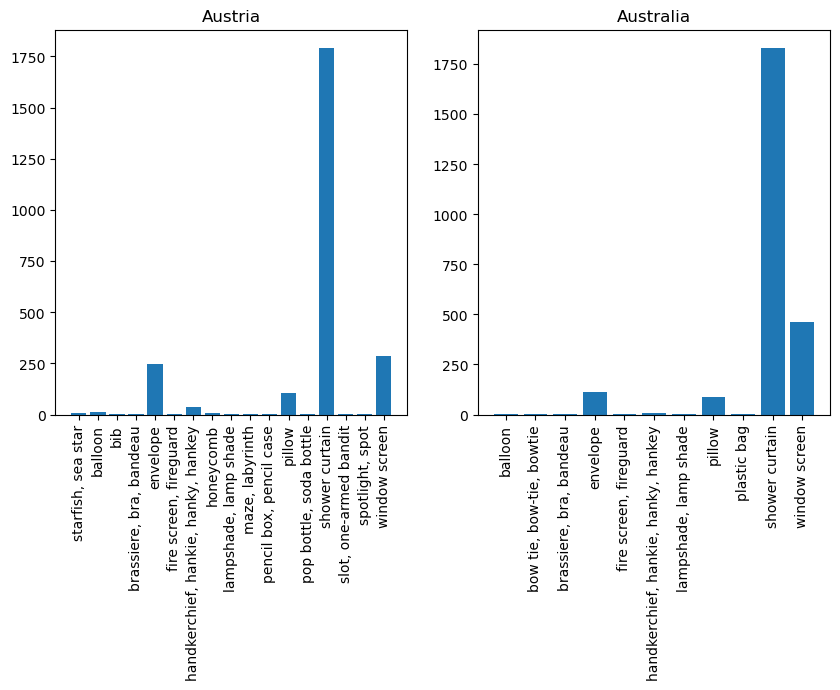

In [ ]:
plt.figure(figsize = (10, 5))

for i, country in enumerate(("Austria", "Australia")):
    top_predictions = np.argmax(predictions[labels == i], axis = 1)
    unique, counts = np.unique(top_predictions, return_counts=True)
    print({unique[j]: counts[j] for j in range(len(unique))})
    ax = plt.subplot(1, 2, i + 1)
    plt.bar([class_names[j] for j in unique], counts)
    plt.xticks(rotation=90)
    plt.title(country)


plt.show()

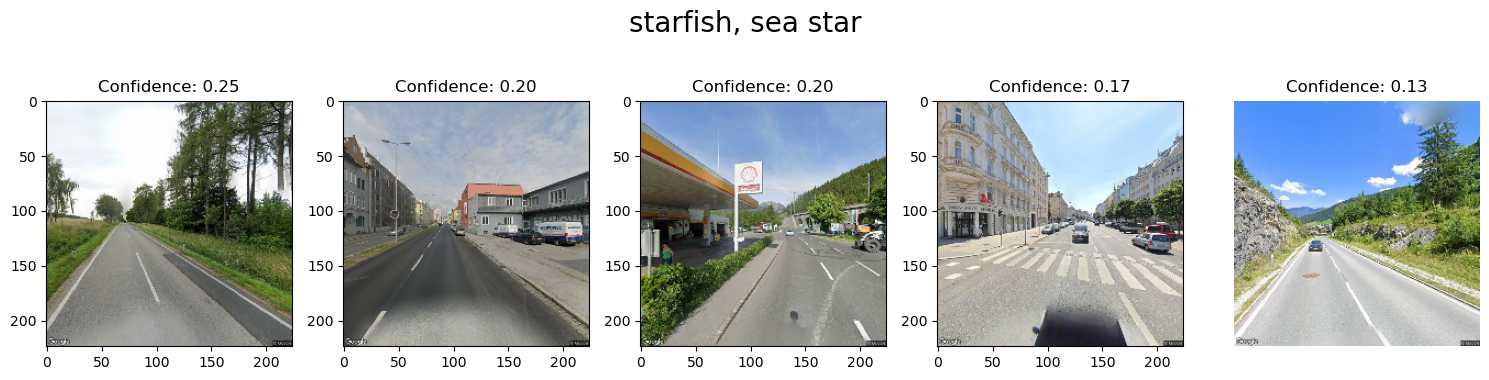

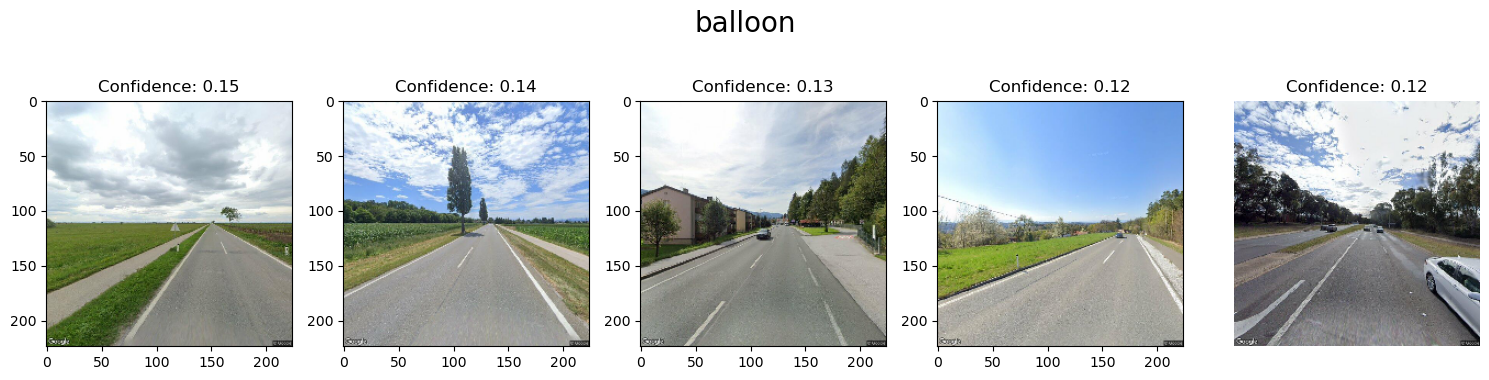

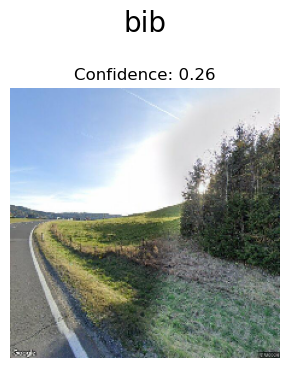

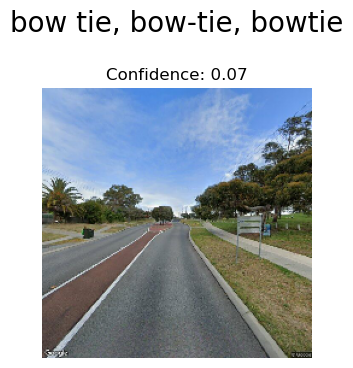

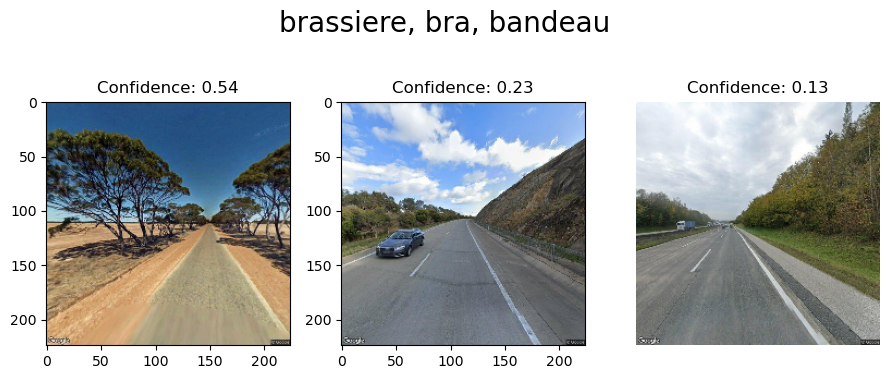

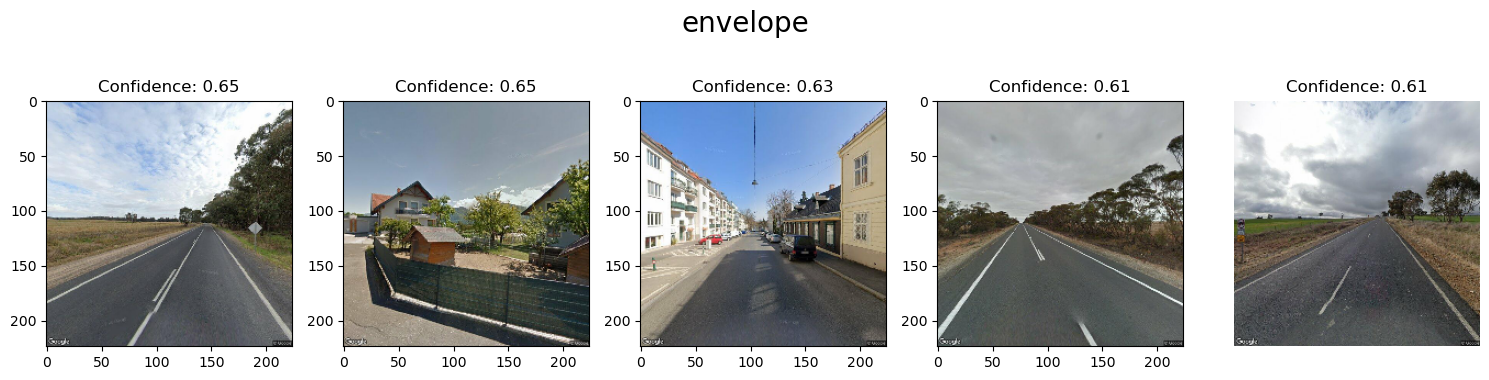

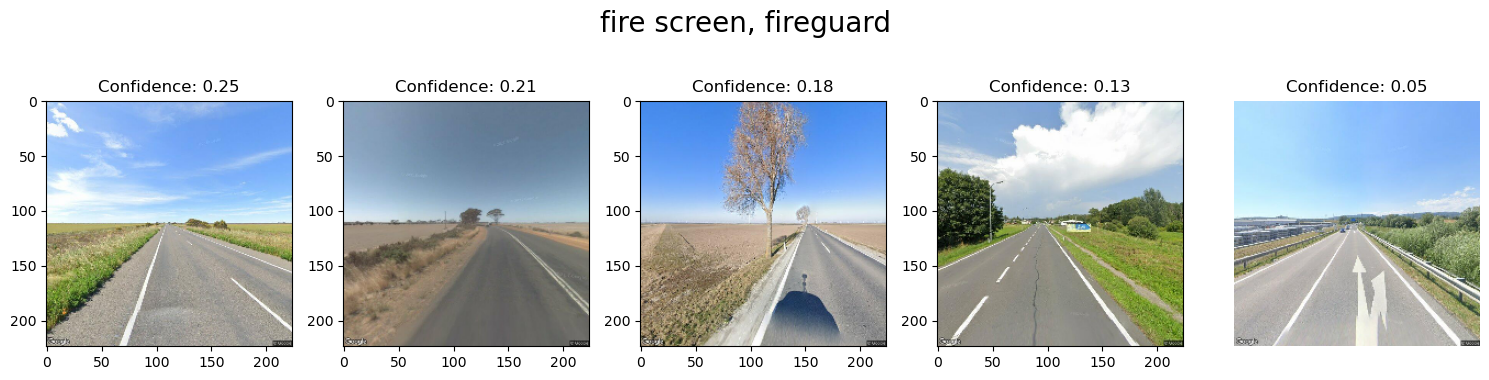

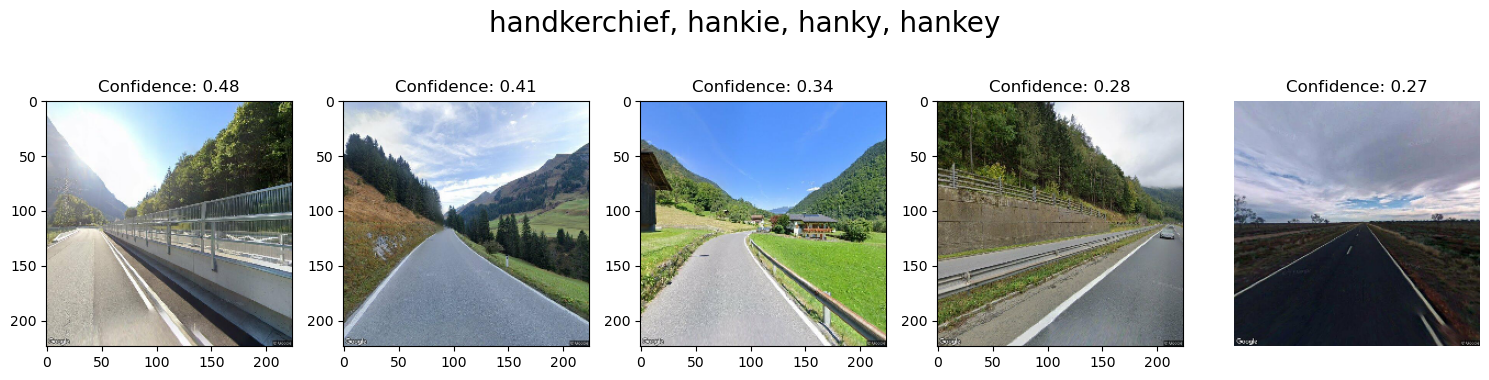

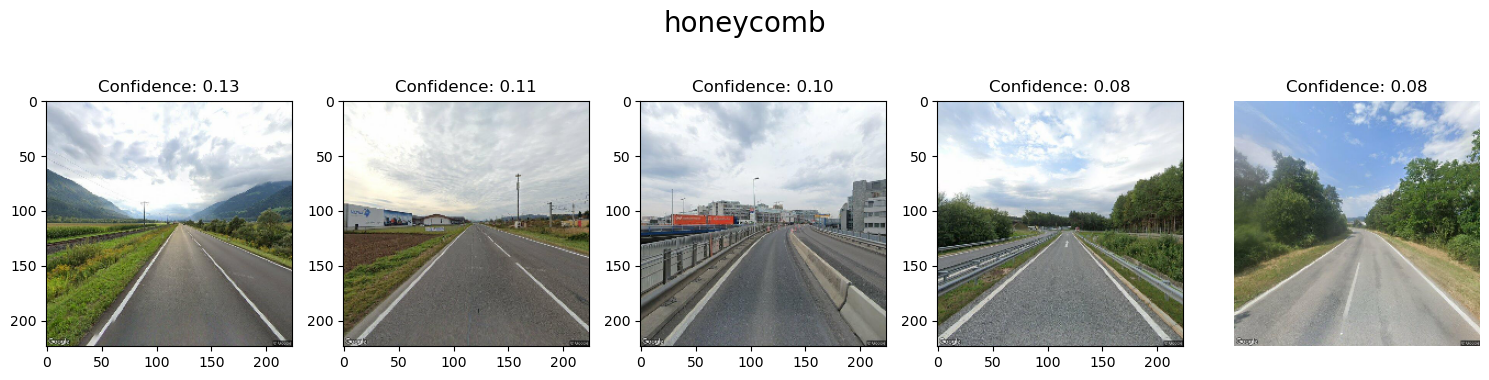

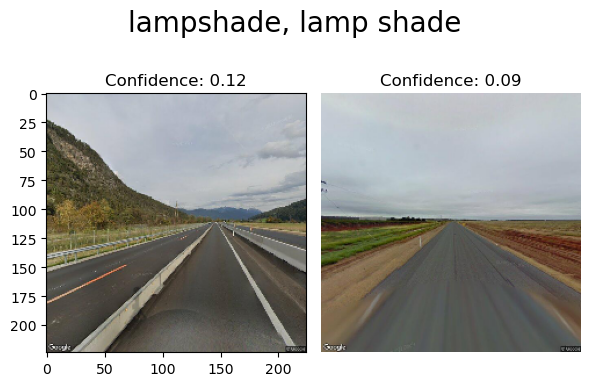

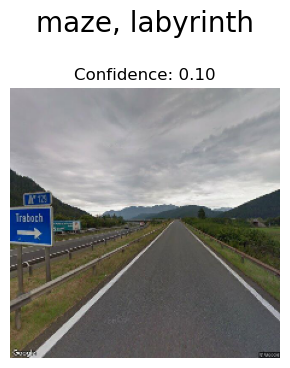

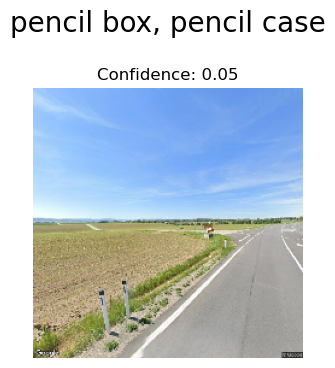

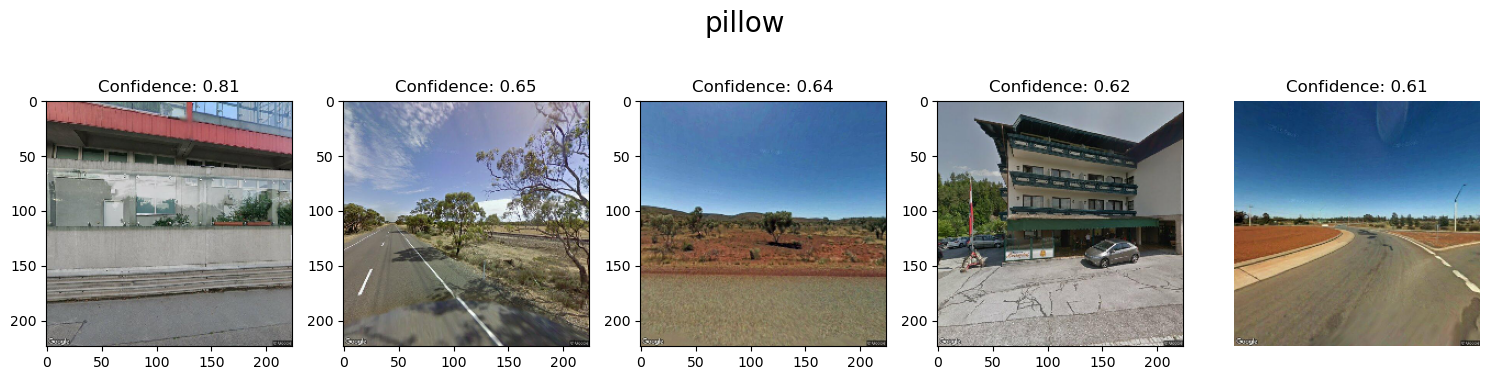

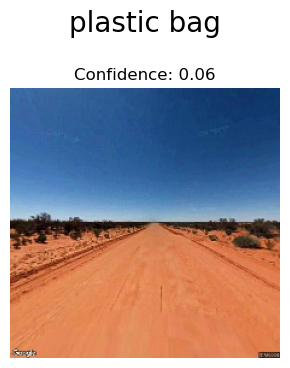

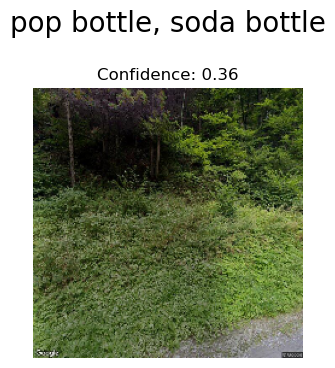

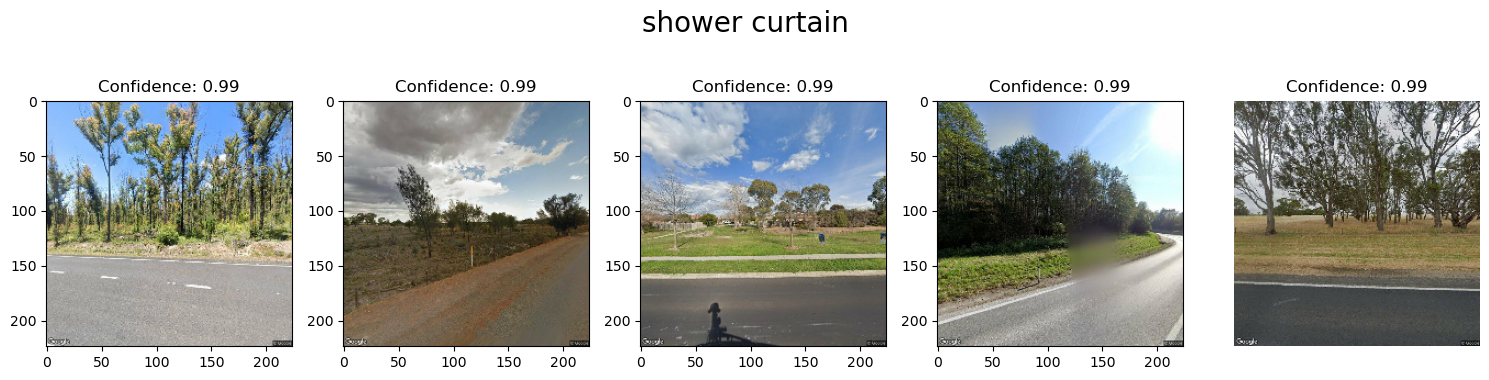

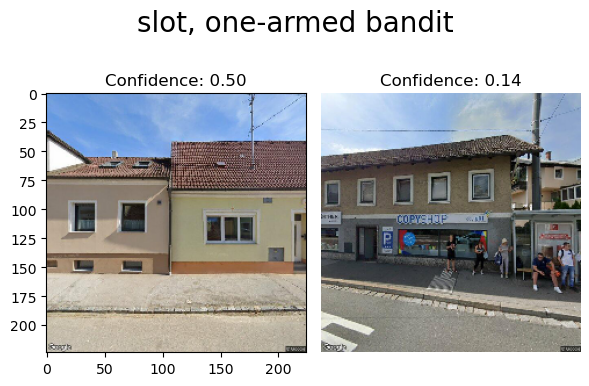

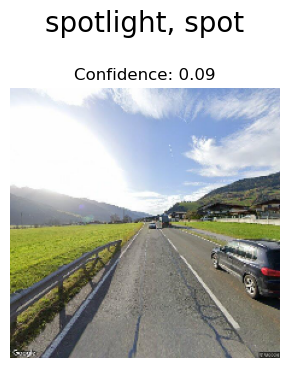

In [ ]:

top_predictions = np.argmax(predictions, axis = 1)
unique, counts = np.unique(top_predictions, return_counts=True)
for label in unique:
    corresponding_images = images[top_predictions == label]
    corresponding_predictions = predictions[top_predictions == label][:,label]
    sorted_images_and_predictions = [(image, prediction) for prediction, image in sorted(zip(corresponding_predictions, corresponding_images), reverse = True)]
    fig = plt.figure(figsize=(3*min(5,len(corresponding_images)), 4))
    fig.suptitle(class_names[label], size = 20)
    for i, (image, prediction) in enumerate(sorted_images_and_predictions):
        ax = plt.subplot(1, min(5,len(sorted_images_and_predictions)), i + 1)
        plt.imshow(tf.cast(image, tf.uint8))
        plt.title(f"Confidence: {prediction:.2f}")
        if i == 4:
            break
    plt.axis("off")
    plt.tight_layout()
    plt.show()
